# Dutch Corpora

In [15]:
# Install tempo-embeddings from GitHub
# This can also refer to a specific version or branch

%pip install --upgrade pip  # Required for properly resolving dependencies
%pip uninstall -y tempo_embeddings  # Remove existing installation
%pip install --upgrade git+https://github.com/Semantics-of-Sustainability/tempo-embeddings.git

# %pip install -e ../

Obtaining file:///Users/jose/Repos/tempo-embeddings
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for tempo_embeddings (pyproject.toml) ... done
  Created wheel for tempo_embeddings: filename=tempo_embeddings-0.0.1-0.editable-py3-none-any.whl size=8963 sha256=fd188eb0d1a9e40ebfae098ac7cc6a50c0db90a4deb88db1be3226fe0c6b74a6
  Stored in directory: /private/var/folders/79/zf67ls7520x9m4mj7nx6q07w0000gp/T/pip-ephem-wheel-cache-tmp901gu/wheels/de/25/96/d92b7a130b730e0ab67770d76841f36cb3d1f9cda32a4a539b
Successfully built tempo_embeddings
  Attempting uninstall: tempo_embeddings
    Found existing installation: tempo_embeddings 0.0.1
    Uninstalling tempo_embeddings-0.0.1:
      Successfully uninstalled tempo_embeddings-0.0.1
Note: you may need to restart the kernel to use updated packages.


In [16]:
# make sure installation has succeeded
import tempo_embeddings

In [17]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
try:
    import google.colab

    IN_COLAB = True
except ModuleNotFoundError:
    IN_COLAB = False

## Load Database

In [19]:
%autoreload now

from pathlib import Path
from tqdm import tqdm
from tempo_embeddings.text.corpus import Corpus

In [20]:
from tempo_embeddings.embeddings.vector_database import ChromaDatabaseManager

MODEL_NAME = "NetherlandsForensicInstitute/robbert-2022-dutch-sentence-transformers"
FILTER_TERMS = ["duurzaam"]

db = ChromaDatabaseManager(db_path="testing_db_custom", embedder_name=MODEL_NAME, batch_size=10)
db.connect()

collection_name = "anp_sg_corpus"

anp_sg_corpus = Corpus.from_chroma_db(db, collection_name=collection_name, filter_terms=FILTER_TERMS)

Retrieved existing collection 'anp_sg_corpus'


In [21]:
for p in anp_sg_corpus.passages[:20]:
    print(len(p), p)

corpus = anp_sg_corpus

print(corpus.embeddings.shape)

200 Passage('boeren gemakkelijker een bedrijf kunnen overnemen en kunnen investeren in de toekomstbestendigheid ervan. Tenminste, dat lijkt zo. Gezien de duurzaamheidsopgave waar de landbouw voor staat, kunnen die', {'': '1920', 'RecId': 'h-tk-20182019-3-6', 'chamber': 'TweedeKamer', 'datapoint_x': 9.365038871765137, 'datapoint_y': 4.419315814971924, 'date': '2018-09-21', 'speakers': 'De voorzitter :|Minister Rutte :|De heer Wilders ( PVV ):|Minister Rutte :|De heer Wilders ( PVV ):|Minister Rutte :|De heer Wilders ( PVV ):|Minister Rutte :|De heer Wilders ( PVV ):|Minister Rutte :|De heer Van Haersma Buma ( CDA ):|Minister Rutte :|De heer Van Haersma Buma ( CDA ):|Minister Rutte :|De heer Van der Staaij ( SGP ):|Minister Rutte :|De heer Van der Staaij ( SGP ):|Minister Rutte :|De heer Wilders ( PVV ):|Minister Rutte :|De heer Wilders ( PVV ):|Minister Rutte :|De heer Wilders ( PVV ):|Minister Rutte :|De voorzitter :|De heer Wilders ( PVV ):|Minister Rutte :|De voorzitter :|De heer Wil

## Read Stopwords

In [22]:
!wget --continue https://raw.githubusercontent.com/Semantics-of-Sustainability/tempo-embeddings/main/tempo_embeddings/data/stopwords-filter-nl.txt

zsh:1: command not found: wget


In [23]:
stopwords_file = Path("stopwords-filter-nl.txt")

with open(stopwords_file.absolute(), "rt") as f:
    stopwords = set(f.read().splitlines())

stopwords.update(
    {
        "wij",
        "we",
        "moeten",
        "heer",
        "mevrouw",
        "minister",
        "voorzitter",
        "gaat",
        "wel",
        "den",
    }
)

## Cluster

In [24]:
%autoreload now

# Arguments: min_cluster_size=10, cluster_selection_epsilon=0.1, ...
# See https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html for full list

# e.g. min_samples=10, cluster_selection_epsilon=0.2, cluster_selection_method="leaf"

clusters = corpus.cluster(min_cluster_size=10, cluster_selection_epsilon=0.1)
print(clusters)

[Subcorpus(16, [0, 307, 349, 388, 425, 436, 453, 494, 545, 626]), Subcorpus(19, [1, 144, 234, 463, 651, 796, 810, 879, 940, 996]), Subcorpus(-1, [2, 3, 4, 8, 10, 11, 13, 18, 21, 22]), Subcorpus(4, [5, 69, 86, 164, 192, 204, 281, 283, 314, 438]), Subcorpus(0, [6, 16, 25, 55, 57, 60, 72, 84, 107, 169]), Subcorpus(5, [7, 64, 159, 224, 275, 409, 475, 735, 1081, 1420]), Subcorpus(17, [9, 48, 78, 196, 249, 260, 278, 493, 518, 525]), Subcorpus(11, [12, 15, 62, 66, 70, 77, 83, 85, 100, 118]), Subcorpus(7, [14, 68, 286, 291, 344, 441, 620, 804, 1000, 1384]), Subcorpus(20, [17, 342, 351, 466, 467, 474, 488, 533, 585, 596]), Subcorpus(9, [19, 23, 126, 130, 133, 138, 182, 213, 216, 245]), Subcorpus(27, [20, 35, 74, 101, 185, 340, 341, 346, 364, 479]), Subcorpus(24, [26, 34, 54, 73, 91, 105, 136, 143, 180, 227]), Subcorpus(25, [27, 162, 285, 315, 333, 361, 373, 521, 689, 706]), Subcorpus(3, [28, 197, 200, 263, 306, 359, 380, 423, 431, 447]), Subcorpus(2, [32, 50, 80, 119, 120, 128, 149, 266, 304, 3

In [25]:
for cluster in clusters:
    cluster.set_topic_label(exclude_words=frozenset(stopwords | set(FILTER_TERMS)), n=5)
    print(cluster)

Subcorpus('boeren; landbouw; duurzaamheid; boer; eerlijke', [0, 307, 349, 388, 425, 436, 453, 494, 545, 626])
Subcorpus('duurzaamheid; economie; mening; financiële; dierenwelzijn', [1, 144, 234, 463, 651, 796, 810, 879, 940, 996])
Subcorpus('Outliers', [2, 3, 4, 8, 10, 11, 13, 18, 21, 22])
Subcorpus('gepubliceerd; rondgezonden; 2017; funderingsherstel; 2018', [5, 69, 86, 164, 192, 204, 281, 283, 314, 438])
Subcorpus('herstel; wereldeconomie; red; tijd; eigen', [6, 16, 25, 55, 57, 60, 72, 84, 107, 169])
Subcorpus('vervoer; vao; orde; stemmingen; moties', [7, 64, 159, 224, 275, 409, 475, 735, 1081, 1420])
Subcorpus('werk; mensen; participatiewet; pensioenstelsel; arbeidsvermogen', [9, 48, 78, 196, 249, 260, 278, 493, 518, 525])
Subcorpus('verduurzaamd; woningen; corporaties; huis; duurzaamheid', [12, 15, 62, 66, 70, 77, 83, 85, 100, 118])
Subcorpus('japan; duurzaamheidshoofdstuk; walvisjacht; handelsverdrag; commissie', [14, 68, 286, 291, 344, 441, 620, 804, 1000, 1384])
Subcorpus('duurz

/Users/jose/Repos/tempo-embeddings/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [26]:
with open("clusters.txt", "wt") as f:
    for cluster in clusters:
        print(
            ", ".join(
                cluster.top_words(
                    exclude_words=frozenset(stopwords | set(FILTER_TERMS)), n=5
                )
            ),
            file=f,
        )

# Visualize Embeddings

<Axes: xlabel='x', ylabel='y'>

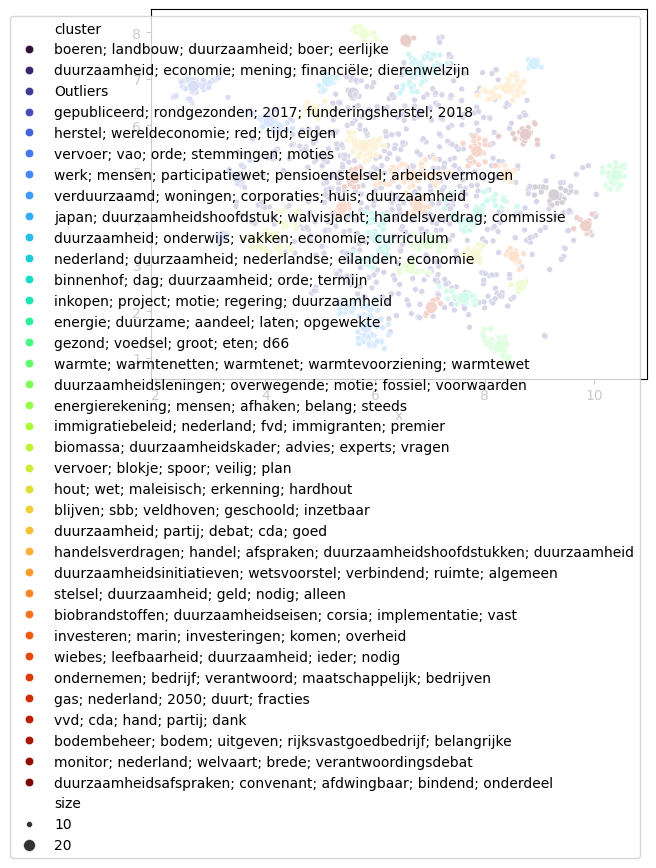

In [27]:
%autoreload now

from tempo_embeddings.visualization.clusters import ClusterVisualizer

visualizer = ClusterVisualizer(*clusters)
visualizer.visualize()

In [28]:
import os
from bokeh.io import output_notebook
from bokeh.plotting import show
from tempo_embeddings.visualization.bokeh import BokehInteractiveVisualizer


output_notebook()

visualizer = BokehInteractiveVisualizer(
    *clusters, metadata_fields=corpus.metadata_fields(), width=2000, height=1000
)

os.environ[
    "BOKEH_ALLOW_WS_ORIGIN"
] = "*"

show(visualizer.create_document)

Loading BokehJS ...